In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymutspec.annotation import calculate_mutspec, CodonAnnotation, mutations_summary

sns.set_style()

In [2]:
coda = CodonAnnotation(2)

## Load prepared mutations and reference

In [3]:
mutations = pd.read_csv("https://raw.githubusercontent.com/mitoclub/mtdnaMutSpecOfCancers/main/data/processed/mutations.csv")
print(mutations.shape)
mutations.head()

(7611, 16)


,tissue,TurnOverDays,tumor_var_freq,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS,AltCodon,Label,Mut
0,Bladder,200.0,38.7900,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
1,Pancreas,360.0,21.0500,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
2,Bladder,200.0,10.1400,6011,T,TTA,1,CDS,COX1,108,3,CTT,426.0,CTC,2,T[T>C]A
3,Bladder,200.0,37.3900,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C
4,Esophagus,11.0,0.7013,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C


In [4]:
Ref = pd.read_csv("https://raw.githubusercontent.com/mitoclub/mtdnaMutSpecOfCancers/main/data/processed/ref_annot.csv")
print(Ref.shape)
Ref.head()

(16569, 10)


,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS
0,1,G,NaN,-1,D-loop,NaN,-1,-1,NaN,NaN
1,2,A,GAT,-1,D-loop,NaN,-1,-1,NaN,NaN
2,3,T,ATC,-1,D-loop,NaN,-1,-1,NaN,NaN
3,4,C,TCA,-1,D-loop,NaN,-1,-1,NaN,NaN
4,5,A,CAC,-1,D-loop,NaN,-1,-1,NaN,NaN


### Describe observed mutations

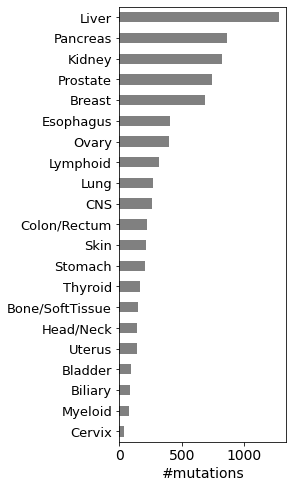

In [5]:
plt.figure(figsize=(3, 8))
mutations.tissue.value_counts(ascending=True).plot.barh(color="gray")
plt.xlabel("#mutations", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()

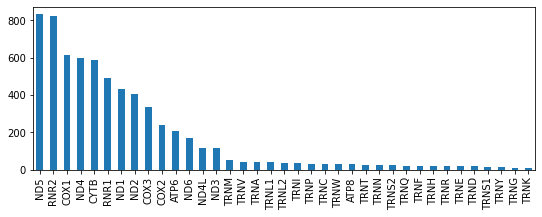

In [6]:
plt.figure(figsize=(9, 3))
mutations.GeneName.value_counts().plot.bar();

In [7]:
mutations.Strand.value_counts()

 1    6209
-1    1359
 0      43
Name: Strand, dtype: int64

In [8]:
mutations.Label.value_counts()

 0    6488
 2     462
 1     373
-1     278
-3      10
Name: Label, dtype: int64

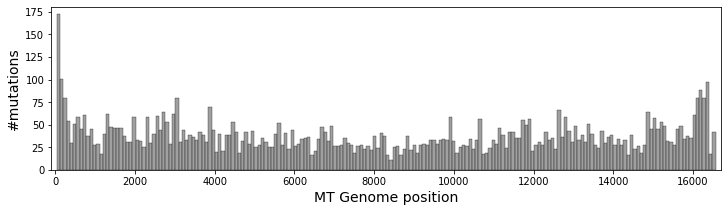

In [9]:
plt.figure(figsize=(12, 3))
# plt.title("Distribution of mutaions on genome")
plt.xlabel("MT Genome position", fontsize=14)
plt.ylabel("#mutations", fontsize=14)
sns.histplot(mutations.Pos, bins=200, color="gray")
plt.xlim(-100, 16700)
plt.show()

In [11]:
mutations_summary(mutations, gene_col="GeneName")

,non-syn,syn,syn4f,Stop gain,Stop to stop
GeneName,,,,,
ATP6,150,51,31,5,0
ATP8,11,13,2,5,0
COX1,428,124,72,59,0
COX2,184,45,28,9,1
COX3,261,47,22,30,0
CYTB,450,83,49,50,3
ND1,337,74,44,17,3
ND2,285,90,56,27,3
ND3,83,29,7,4,0


## For asymmetry

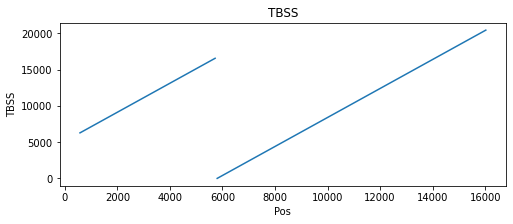

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(Ref.Pos, Ref.TBSS)
plt.title("TBSS")
plt.ylabel("TBSS")
plt.xlabel("Pos")
plt.show()

In [24]:
major_arc_min_pos = 5800
major_arc_max_pos = 16000

region_size = 5000
print(f"Low TSSS region: {major_arc_min_pos}-{major_arc_min_pos+region_size}\nHigh TSSS region: {major_arc_max_pos-region_size}-{major_arc_max_pos}\n")
print("Please check that they are not intersect!!")

Low TSSS region: 5800-10800
High TSSS region: 11000-16000

Please check that they are not intersect!!


**Prepare OBS**

In [14]:
obs_low_tsss_all = mutations[
    (mutations.Type != "D-loop") &
    (mutations.Pos > major_arc_min_pos) &
    (mutations.Pos < major_arc_min_pos+region_size) & 
    (mutations.Strand == 1)
]
obs_high_tsss_all = mutations[
    (mutations.Type != "D-loop") &
    (mutations.Pos > major_arc_max_pos-region_size) &
    (mutations.Pos < major_arc_max_pos) &
    (mutations.Strand == 1)
]

obs_low_tsss_syn = obs_low_tsss_all[obs_low_tsss_all.Label >= 1]
obs_high_tsss_syn = obs_high_tsss_all[obs_high_tsss_all.Label >= 1]

print(obs_low_tsss_all.shape, obs_high_tsss_all.shape)
print(obs_low_tsss_syn.shape, obs_high_tsss_syn.shape)

(1724, 16) (2048, 16)
(338, 16) (321, 16)


In [15]:
print(
    obs_low_tsss_all.TBSS.mean().round(),
    obs_low_tsss_syn.TBSS.mean().round(),
    obs_high_tsss_all.TBSS.mean().round(),
    obs_high_tsss_syn.TBSS.mean().round(),
)

5073.0 4956.0 15170.0 14981.0


**Prepare EXP**

In [16]:
cur_ref = Ref[(Ref.Type != "D-loop")].assign(AltNuc="ACGT")
cur_ref["AltNuc"] = cur_ref.AltNuc.apply(list)
cur_ref["AltCodon"] = cur_ref.apply(lambda x: coda.get_syn_codons(x.Codon, x.PosInCodon-1) if x.PosInCodon > -1 else [], axis=1)

ref_low_tsss = cur_ref[
    (cur_ref.Pos > major_arc_min_pos) &
    (cur_ref.Pos < major_arc_min_pos+region_size) & 
    (cur_ref.Strand == 1)
]
ref_high_tsss = cur_ref[
    (cur_ref.Pos > major_arc_max_pos-region_size) &
    (cur_ref.Pos < major_arc_max_pos) &
    (cur_ref.Strand == 1)
]

In [17]:
exp_low_tsss_all = ref_low_tsss.explode("AltNuc")
exp_low_tsss_all = exp_low_tsss_all[exp_low_tsss_all.Nuc != exp_low_tsss_all.AltNuc]
exp_low_tsss_all["Sbs12"] = exp_low_tsss_all.Nuc + ">" + exp_low_tsss_all.AltNuc
exp_low_tsss_all["Sbs192"] = exp_low_tsss_all.Context.str.get(0) + "[" + exp_low_tsss_all["Sbs12"] + "]" + exp_low_tsss_all.Context.str.get(-1)

exp_low_tsss_syn = ref_low_tsss.explode("AltCodon").dropna(subset="AltCodon")
exp_low_tsss_syn["Sbs12"] = exp_low_tsss_syn.Nuc + ">" + exp_low_tsss_syn.apply(lambda x: x.AltCodon[x.PosInCodon-1], axis=1)
exp_low_tsss_syn["Sbs192"] = exp_low_tsss_syn.Context.str.get(0) + "[" + exp_low_tsss_syn["Sbs12"] + "]" + exp_low_tsss_syn.Context.str.get(-1)


exp_high_tsss_all = ref_high_tsss.explode("AltNuc")
exp_high_tsss_all = exp_high_tsss_all[exp_high_tsss_all.Nuc != exp_high_tsss_all.AltNuc]
exp_high_tsss_all["Sbs12"] = exp_high_tsss_all.Nuc + ">" + exp_high_tsss_all.AltNuc
exp_high_tsss_all["Sbs192"] = exp_high_tsss_all.Context.str.get(0) + "[" + exp_high_tsss_all["Sbs12"] + "]" + exp_high_tsss_all.Context.str.get(-1)

exp_high_tsss_syn = ref_high_tsss.explode("AltCodon").dropna(subset="AltCodon")
exp_high_tsss_syn["Sbs12"] = exp_high_tsss_syn.Nuc + ">" + exp_high_tsss_syn.apply(lambda x: x.AltCodon[x.PosInCodon-1], axis=1)
exp_high_tsss_syn["Sbs192"] = exp_high_tsss_syn.Context.str.get(0) + "[" + exp_high_tsss_syn["Sbs12"] + "]" + exp_high_tsss_syn.Context.str.get(-1)


exp_low_tsss_all_freqs = exp_low_tsss_all.Sbs192.value_counts().to_dict()
exp_low_tsss_syn_freqs = exp_low_tsss_syn.Sbs192.value_counts().to_dict()
exp_high_tsss_all_freqs = exp_high_tsss_all.Sbs192.value_counts().to_dict()
exp_high_tsss_syn_freqs = exp_high_tsss_syn.Sbs192.value_counts().to_dict()

print(exp_low_tsss_all.shape)
print(exp_low_tsss_syn.shape)
print(exp_high_tsss_all.shape)
print(exp_high_tsss_syn.shape)

(14394, 14)
(3271, 14)
(13065, 14)
(2976, 14)


In [18]:
print(
    exp_low_tsss_all.TBSS.mean().round(),
    exp_low_tsss_syn.TBSS.mean().round(),
    exp_high_tsss_all.TBSS.mean().round(),
    exp_high_tsss_syn.TBSS.mean().round(),
)

5134.0 5067.0 15091.0 15088.0


In [19]:
ms_low_tsss_all = calculate_mutspec(obs_low_tsss_all, exp_low_tsss_all_freqs, use_context=True)
ms_low_tsss_syn = calculate_mutspec(obs_low_tsss_syn, exp_low_tsss_syn_freqs, use_context=True)
ms_high_tsss_all = calculate_mutspec(obs_high_tsss_all, exp_high_tsss_all_freqs, use_context=True)
ms_high_tsss_syn = calculate_mutspec(obs_high_tsss_syn, exp_high_tsss_syn_freqs, use_context=True)

In [20]:
ms_low_tsss_all.to_csv("../data/cancer_asymmetry/ms_low_tsss_all.csv", index=False)
ms_low_tsss_syn.to_csv("../data/cancer_asymmetry/ms_low_tsss_syn.csv", index=False)
ms_high_tsss_all.to_csv("../data/cancer_asymmetry/ms_high_tsss_all.csv", index=False)
ms_high_tsss_syn.to_csv("../data/cancer_asymmetry/ms_high_tsss_syn.csv", index=False)

In [21]:
print(ms_low_tsss_all.MutSpec.isna().sum(),
    ms_low_tsss_syn.MutSpec.isna().sum(),
    ms_high_tsss_all.MutSpec.isna().sum(),
    ms_high_tsss_syn.MutSpec.isna().sum()
)

0 0 0 0


In [22]:
print((ms_low_tsss_all.MutSpec == 0).sum(),
    (ms_low_tsss_syn.MutSpec == 0).sum(),
    (ms_high_tsss_all.MutSpec == 0).sum(),
    (ms_high_tsss_syn.MutSpec == 0).sum()
)

75 121 70 122
